In [18]:
from datasets import load_dataset

ds_small = load_dataset("linxy/LaTeX_OCR", "small")

In [17]:
ds_small

DatasetDict({
    train: Dataset({
        features: ['image', 'text'],
        num_rows: 50
    })
    validation: Dataset({
        features: ['image', 'text'],
        num_rows: 30
    })
    test: Dataset({
        features: ['image', 'text'],
        num_rows: 30
    })
})

In [ ]:
# import pickle
# import os
# import io
# from PIL import Image
# import numpy as np

# # Example: replace `ds_small` and splits as needed
# splits = {
#     'train': ds_small['train'],
#     'validation': ds_small['validation'],
#     'test': ds_small['test']
# }

# for split, items in splits.items():
#     split_dir = f'data/ds_small/{split}'
#     os.makedirs(split_dir, exist_ok=True)
#     captions_lines = []
#     images = {}
#     for idx, item in enumerate(items):
#         image = item['image']
#         if isinstance(image, bytes):
#             img = Image.open(io.BytesIO(image))
#         else:
#             img = image
#         if img.mode != 'L':
#             img = img.convert('L')
#         img_np = np.array(img)  # Convert to numpy array
#         img_filename = f'{split}_{idx}.jpg'
#         caption = item['text'] if 'text' in item else item.get('caption', '')
#         captions_lines.append(f'{img_filename}\t{caption}')
#         images[img_filename] = img_np
#     with open(os.path.join(split_dir, 'caption.txt'), 'w', encoding='utf-8') as f:
#         for line in captions_lines:
#             f.write(line + '\n')
#     with open(os.path.join(split_dir, 'images.pkl'), 'wb') as f:
#         pickle.dump(images, f)
#     print(f'Saved {split} set: {len(items)} images and captions in hme100k format (numpy arrays).')


Saved train set: 50 images and captions in hme100k format (numpy arrays).
Saved validation set: 30 images and captions in hme100k format (numpy arrays).
Saved test set: 30 images and captions in hme100k format (numpy arrays).


In [ ]:
# import os
# splits = ['train', 'validation', 'test']
# all_captions = []
# for split in splits:
#     split_dir = f'data/ds_small/{split}'
#     with open(os.path.join(split_dir, 'caption.txt'), 'r', encoding='utf-8') as f:
#         for line in f:
#             parts = line.strip().split('\t', 1)
#             if len(parts) == 2:
#                 all_captions.append(parts[1])

# # Tokenize captions into symbols (split by space)
# symbols = set()
# for caption in all_captions:
#     for token in caption.split():
#         symbols.add(token)

# # Save dictionary.txt
# dict_path = 'data/ds_small/dictionary.txt'
# with open(dict_path, 'w', encoding='utf-8') as f:
#     for symbol in sorted(symbols):
#         f.write(symbol + '\n')
# print(f'Saved dictionary.txt with {len(symbols)} unique symbols.')

Saved dictionary.txt with 157 unique symbols.


In [6]:
# %%writefile tamer_dataset_creator.py
# import pickle
# import os
# import io
# from PIL import Image
# import numpy as np

# def tamer_dataset_creator(hf_dataset, out_dir=None, splits_to_process=None):

#     """
#     Convert a Hugging Face dataset to hme100k format for TAMER.
#     Args:
#         hf_dataset: Hugging Face dataset dict (e.g., from load_dataset)
#         out_dir: Output directory for the formatted dataset
#         splits_to_process: list of splits to process (e.g., ['train', 'validation', 'test']). If None, process all available.
#     """
#     if out_dir is None:
#         out_dir = f'data/{hf_dataset}'

#     all_possible_splits = list(hf_dataset.keys())
#     if splits_to_process is None:
#         splits_to_process = all_possible_splits
#     all_captions = []
#     for split in splits_to_process:
#         if split not in hf_dataset:
#             print(f"Split '{split}' not found in dataset, skipping.")
#             continue
#         items = hf_dataset[split]
#         split_dir = os.path.join(out_dir, split)
#         os.makedirs(split_dir, exist_ok=True)
#         captions_lines = []
#         images = {}
#         for idx, item in enumerate(items):
#             image = item['image']
#             if isinstance(image, bytes):
#                 img = Image.open(io.BytesIO(image))
#             else:
#                 img = image
#             if img.mode != 'L':
#                 img = img.convert('L')
#             img_np = np.array(img)
#             img_filename = f'{split}_{idx}.jpg'
#             caption = item['text'] if 'text' in item else item.get('caption', '')
#             captions_lines.append(f'{img_filename}\t{caption}')
#             images[img_filename] = img_np
#             all_captions.append(caption)
#         with open(os.path.join(split_dir, 'caption.txt'), 'w', encoding='utf-8') as f:
#             for line in captions_lines:
#                 f.write(line + '\n')
#         with open(os.path.join(split_dir, 'images.pkl'), 'wb') as f:
#             pickle.dump(images, f)
#         print(f'Saved {split} set: {len(items)} images and captions in hme100k format (numpy arrays).')

#     # Tokenize captions into symbols (split by space)
#     symbols = set()
#     for caption in all_captions:
#         for token in caption.split():
#             symbols.add(token)

#     # Save dictionary.txt
#     dict_path = os.path.join(out_dir, 'dictionary.txt')
#     with open(dict_path, 'w', encoding='utf-8') as f:
#         for symbol in sorted(symbols):
#             f.write(symbol + '\n')
#     print(f'Saved dictionary.txt with {len(symbols)} unique symbols.')


Overwriting tamer_dataset_creator.py


In [14]:
import pickle
import matplotlib.pyplot as plt
from PIL import Image

def show_first_five_images_with_captions(images_pkl_path, caption_txt_path):
    with open(caption_txt_path, 'r', encoding='utf-8') as f:
        captions = f.readlines()

    with open(images_pkl_path, 'rb') as f:
        images = pickle.load(f)

    # Show the first five images with their captions
    for i, (img_filename, img_array) in enumerate(images.items()):
        if i >= 5:
            break
        plt.imshow(img_array, cmap='gray')
        plt.title(captions[i].split('\t', 1)[1].strip())
        plt.axis('off')
        plt.show()


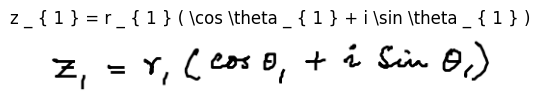

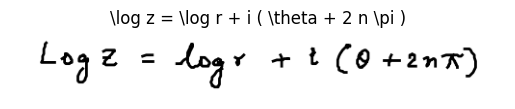

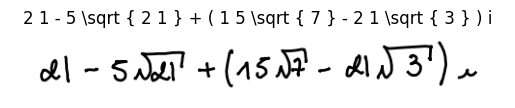

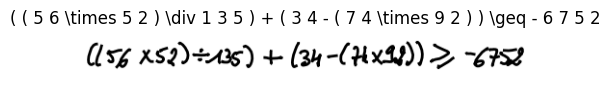

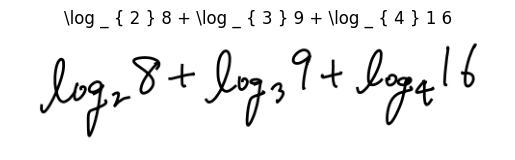

In [15]:
show_first_five_images_with_captions('data/latex_ocr_human_handwrite/train/images.pkl', 'data/latex_ocr_human_handwrite/train/caption.txt')

In [20]:
import pickle
import os
import io
from PIL import Image
import numpy as np
from datasets import load_dataset


def tamer_dataset_creator(dataset_dict, out_dir):
    """
    Convert a local DatasetDict-like object to hme100k format for TAMER.
    Args:
        dataset_dict: dict-like object with split names as keys and datasets as values. Each dataset must have 'image' and 'text' fields.
        out_dir: Output directory for the formatted dataset.
    """
    all_captions = []
    for split_name, split_data in dataset_dict.items():
        split_dir = os.path.join(out_dir, split_name)
        os.makedirs(split_dir, exist_ok=True)
        captions_lines = []
        images = {}
        for idx, item in enumerate(split_data):
            image = item['image']
            if isinstance(image, bytes):
                img = Image.open(io.BytesIO(image))
            else:
                img = image
            if img.mode != 'L':
                img = img.convert('L')
            img_np = np.array(img)
            img_filename = f'{split_name}_{idx}.jpg'
            caption = item['text'] if 'text' in item else item.get('caption', '')
            captions_lines.append(f'{img_filename}\t{caption}')
            images[img_filename] = img_np
            all_captions.append(caption)
        with open(os.path.join(split_dir, 'caption.txt'), 'w', encoding='utf-8') as f:
            for line in captions_lines:
                f.write(line + '\n')
        with open(os.path.join(split_dir, 'images.pkl'), 'wb') as f:
            pickle.dump(images, f)
        print(f"Saved {split_name} set: {len(split_data)} images and captions in hme100k format (numpy arrays).")

    # Tokenize captions into symbols (split by space)
    symbols = set()
    for caption in all_captions:
        for token in caption.split():
            symbols.add(token)

    # Save dictionary.txt
    dict_path = os.path.join(out_dir, 'dictionary.txt')
    with open(dict_path, 'w', encoding='utf-8') as f:
        for symbol in sorted(symbols):
            f.write(symbol + '\n')
    print(f"Saved dictionary.txt with {len(symbols)} unique symbols.")
    print(f'Saved dictionary.txt with {len(symbols)} unique symbols.')



if __name__ == "__main__":
    # Example usage for local dataset_dict
    # from datasets import load_from_disk
    # dataset_dict = load_from_disk('path_to_local_dataset')
    # out_dir = 'output_hme100k_folder'
    # tamer_dataset_creator(dataset_dict, out_dir)
    print("This script is now intended for local DatasetDict-like objects only.\n"
          "Please import and call tamer_dataset_creator(dataset_dict, out_dir) from your own script or notebook.")


This script is now intended for local DatasetDict-like objects only.
Please import and call tamer_dataset_creator(dataset_dict, out_dir) from your own script or notebook.


In [21]:
tamer_dataset_creator(ds_small, 'data/ds_small')

Saved train set: 50 images and captions in hme100k format (numpy arrays).
Saved validation set: 30 images and captions in hme100k format (numpy arrays).
Saved test set: 30 images and captions in hme100k format (numpy arrays).
Saved dictionary.txt with 157 unique symbols.
Saved dictionary.txt with 157 unique symbols.


In [22]:
ds_human_handwrite = load_dataset("linxy/LaTeX_OCR", "human_handwrite")
ds_synthetic_handwrite = load_dataset("linxy/LaTeX_OCR", "synthetic_handwrite")

In [23]:
tamer_dataset_creator(ds_human_handwrite, 'data/latex_ocr_human_handwrite')
tamer_dataset_creator(ds_synthetic_handwrite, 'data/latex_ocr_synthetic_handwrite')

Saved train set: 1200 images and captions in hme100k format (numpy arrays).
Saved validation set: 68 images and captions in hme100k format (numpy arrays).
Saved test set: 70 images and captions in hme100k format (numpy arrays).
Saved dictionary.txt with 83 unique symbols.
Saved dictionary.txt with 83 unique symbols.
Saved train set: 76266 images and captions in hme100k format (numpy arrays).
Saved validation set: 9565 images and captions in hme100k format (numpy arrays).
Saved test set: 9593 images and captions in hme100k format (numpy arrays).
Saved dictionary.txt with 490 unique symbols.
Saved dictionary.txt with 490 unique symbols.
